In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131289 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


W0810 16:30:08.869095 140181797574528 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import os
os.chdir('drive/MyProject/final_project//')
!ls

borrower_table.csv  final_project.ipynb  loan_table.csv


In [0]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def ignore_warn(*args, **kwargs):
  pass
warnings.warn=ignore_warn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', color_codes=True, font_scale=1.5)
color=sns.color_palette()
sns.set_style('darkgrid')


Read data

In [0]:
df_borrower=pd.read_csv('borrower_table.csv')
df_loan=pd.read_csv('loan_table.csv')

In [6]:
print(df_borrower.shape)
print(df_loan.shape)

(101100, 12)
(101100, 5)


In [7]:
df_borrower.head()

loan_id  is_first_loan  ...  age  dependent_number
0   289774              1  ...   47                 3
1   482590              0  ...   33                 1
2   135565              1  ...   38                 8
3   207797              0  ...   24                 1
4   828078              0  ...   36                 1

[5 rows x 12 columns]

In [8]:
df=pd.merge(df_borrower, df_loan, how='left', on='loan_id')
df.head()

loan_id  is_first_loan  ...  loan_granted  loan_repaid
0   289774              1  ...             0          NaN
1   482590              0  ...             0          NaN
2   135565              1  ...             1          1.0
3   207797              0  ...             0          NaN
4   828078              0  ...             0          NaN

[5 rows x 16 columns]

# Mapping:
if bank granted and borrower did not repaid, mark as -1.
if bank granted and borrower did  repaid, mark as 1.
if bankl did not grant, mark as 0

In [9]:
df['labels']=df['loan_repaid'].map({0:-1, 1:1})
df['labels']=df['labels'].fillna(0)
df.head(25)

loan_id  is_first_loan  ...  loan_repaid  labels
0    289774              1  ...          NaN     0.0
1    482590              0  ...          NaN     0.0
2    135565              1  ...          1.0     1.0
3    207797              0  ...          NaN     0.0
4    828078              0  ...          NaN     0.0
5    423171              1  ...          1.0     1.0
6    568977              1  ...          NaN     0.0
7    200139              1  ...          0.0    -1.0
8    991294              0  ...          1.0     1.0
9    875332              0  ...          1.0     1.0
10   954215              1  ...          1.0     1.0
11   778076              1  ...          1.0     1.0
12    47565              1  ...          NaN     0.0
13    73441              0  ...          1.0     1.0
14   993419              0  ...          NaN     0.0
15   614277              0  ...          NaN     0.0
16   249377              1  ...          1.0     1.0
17   387504              0  ...          1.0     1.0
18    26461              1  ...          NaN     0.0
19   895948              0  ...          NaN     0.0
20   561507              0  ...          NaN     0.0
21   127290              1  ...          0.0    -1.0
22   496672              1  ...          1.0     1.0
23   873777              1  ...          1.0     1.0
24   906171              0  ...          NaN     0.0

[25 rows x 17 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 17 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
loan_purpo

# Calculate the score of bank's model

In [11]:
score=df['labels'].sum()
score

13758.0

In [12]:
df['loan_purpose'].value_counts()

home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: loan_purpose, dtype: int64

map 'loan_purpose' to numeric value

In [0]:
df['loan_purpose']=df['loan_purpose'].map({'home': 0, 'business':1, 'investment':2, 'emergency_funds':3, 'other':4})

Extract date to get only month

In [0]:
df['date']=pd.DatetimeIndex(df['date']).month

Overall grating rate:  0.47135509396636993


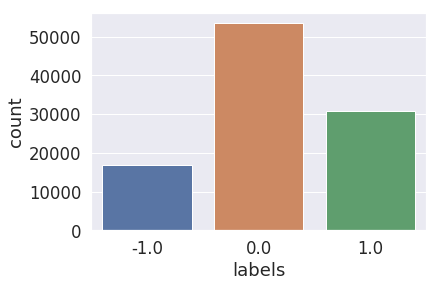

In [15]:
sns.countplot(x='labels', data=df)
print('Overall grating rate: ', df['loan_granted'].sum()/df.shape[0])

# Exploratoty Data Analysis(EDA)


In [0]:
def rstr(df, pred=None):
  obs=df.shape[0]
  types=df.dtypes
  counts=df.count()
  uniques=df.apply(lambda x: [x.unique()])
  nulls=df.isnull().sum()
  distincts=df.apply(lambda x: x.unique().shape[0])
  missing_ration=(df.isnull().sum()/obs)*100
  skewness=df.skew()
  kurtosis=df.kurt()
  if pred== None:
    col=['types', 'counts', 'distincts', 'null', 'missing ration', 'uniques', 'skewness', 'kurtosis']
    data=pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis=1, sort=False)
  else:
    corr=df.corr()[pred]
    data=pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis=1, sort=False)
    corr_col='corr '+pred
    col=['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques' ,'skewness', 'kurtosis', corr_col]
  data.columns=col
  return data
  
  

In [17]:
details_grant=rstr(df)
details_grant

types  ...  kurtosis
loan_id                                            int64  ... -1.197698
is_first_loan                                      int64  ... -1.969543
fully_repaid_previous_loans                      float64  ...  5.042310
currently_repaying_other_loans                   float64  ... -1.682153
total_credit_card_limit                            int64  ... -0.168438
avg_percentage_credit_card_limit_used_last_year  float64  ... -0.280031
saving_amount                                      int64  ...  1.788766
checking_amount                                    int64  ...  0.842597
is_employed                                        int64  ... -1.552062
yearly_salary                                      int64  ... -0.875378
age                                                int64  ... -0.460786
dependent_number                                   int64  ... -1.224547
loan_purpose                                       int64  ... -1.220167
date                                               int64  ... -1.207745
loan_granted                                       int64  ... -1.986867
loan_repaid                                      float64  ... -1.636324
labels                                           float64  ... -0.812216

[17 rows x 8 columns]

We can see missing ration at "fully_repaid_previous_loans" and "currently_repaying_other_loans" are greater than 50% => these fetures can be dropped

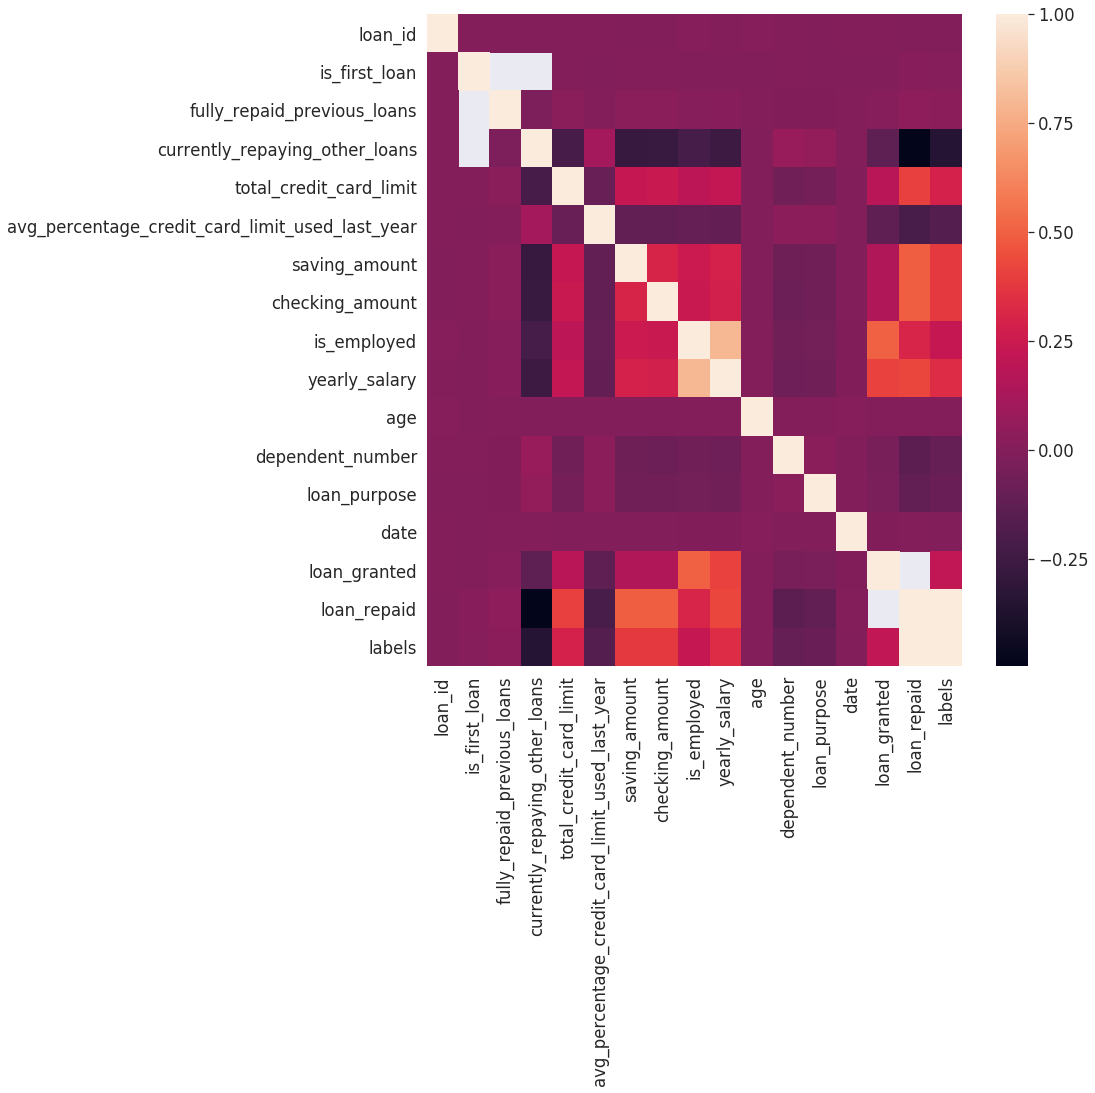

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [0]:
def barchart(feature):
  plt.figure(figsize=(15,7))
  sns.countplot(x='labels',hue=feature, data=df)
  
  

# is_first_loan

In [21]:
df['is_first_loan'].value_counts()

1    54947
0    46153
Name: is_first_loan, dtype: int64

In [22]:
df['is_first_loan'].isnull().sum()

0

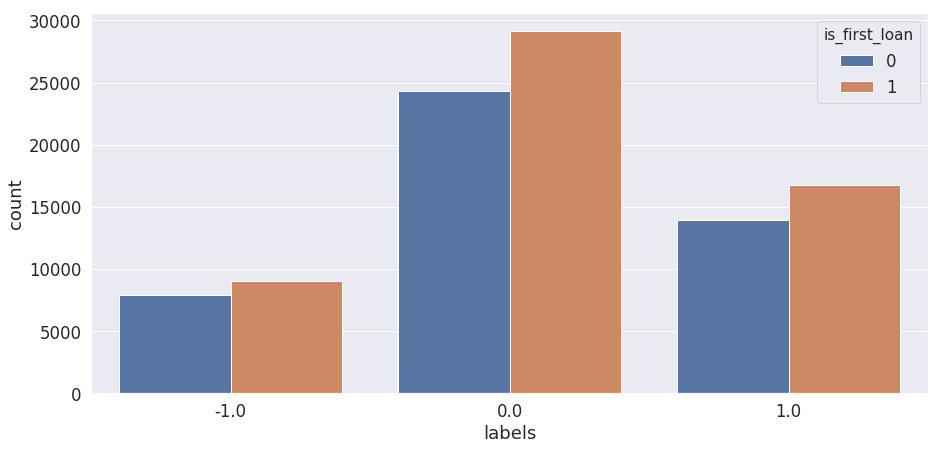

In [23]:
barchart('is_first_loan')

# is_employed

In [24]:
df['is_employed'].value_counts()

1    66592
0    34508
Name: is_employed, dtype: int64

In [25]:
df['is_employed'].isnull().sum()

0

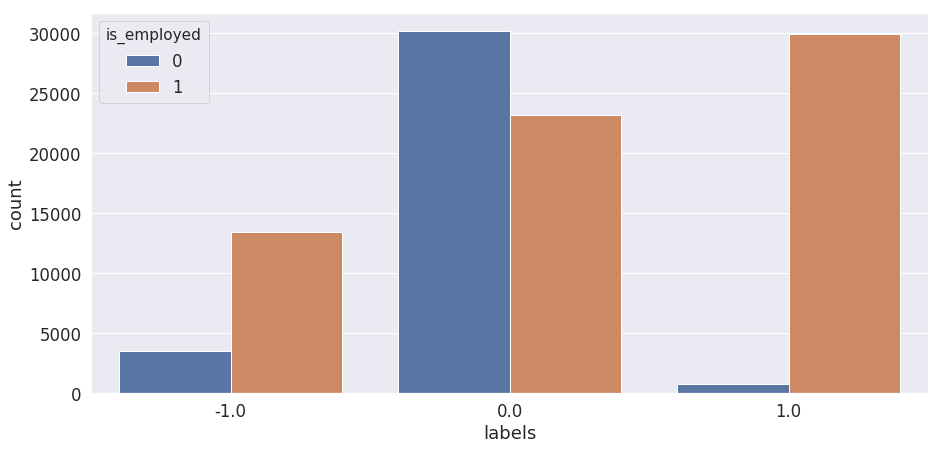

In [26]:
barchart('is_employed')

We can easily see that employed-people is more likely will repaid their loans. Non-employed people is more likely won't be granted loans.

# dependent_number

In [27]:
df['dependent_number'].value_counts()

1    20050
8    19818
2    18153
3    13150
4     9730
5     7257
6     5399
7     4111
0     3432
Name: dependent_number, dtype: int64

In [28]:
df['dependent_number'].isnull().sum()

0

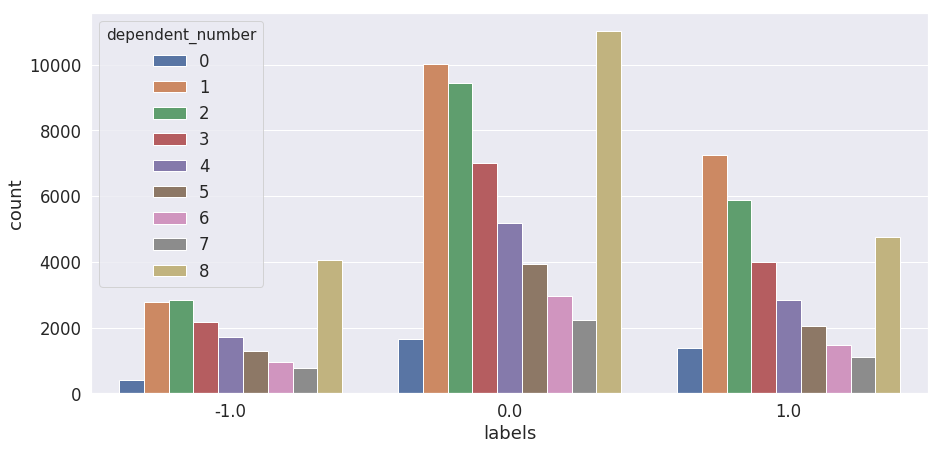

In [29]:
barchart('dependent_number')

We can easily see people whoes dependent value is 8 is more likely won't repaid or is not granted by bank

# loan_purpose

In [30]:
df['loan_purpose'].value_counts()

0    24314
1    21707
2    21484
3    18091
4    15504
Name: loan_purpose, dtype: int64

In [31]:
df['loan_purpose'].isnull().sum()

0

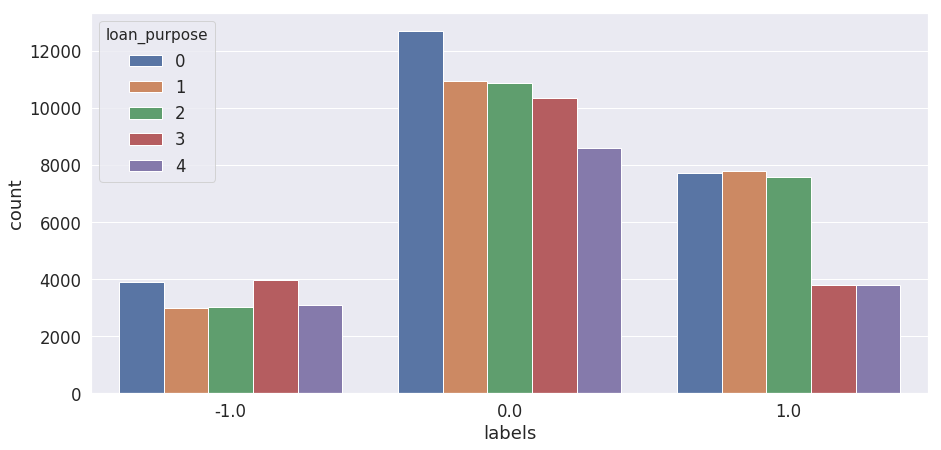

In [32]:
barchart('loan_purpose')

People who want to get loan for their home is more likely won't be granted or repaid.

# total_credit_card_limit

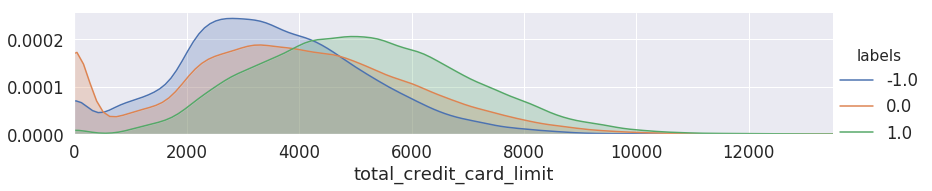

In [33]:


facet=sns.FacetGrid(df, hue='labels', aspect=4)
facet.map(sns.kdeplot, 'total_credit_card_limit', shade=True)
facet.set(xlim=(0, df['total_credit_card_limit'].max()))
facet.add_legend()

As we can see, people who has total credit card limit between 0-800 are more likely won't be granted and those has total credit card limit between 800 and 4100 are more likely won't repaid their loan. We divide this feature into 3 groups: 




1.   Group 0: 0-800
2.   Group 1: 800-4100

3.   Group 2: >4100










In [0]:
df.loc[df['total_credit_card_limit']<=800, 'total_credit_card_limit']=0
df.loc[(df['total_credit_card_limit']>800) & (df['total_credit_card_limit']<=4100), 'total_credit_card_limit']=1

df.loc[df['total_credit_card_limit']>4100, 'total_credit_card_limit']=2

# saving_amount

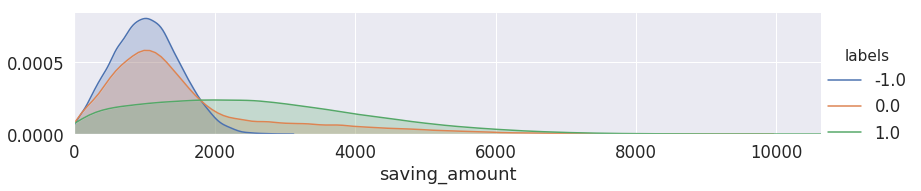

In [35]:
facet=sns.FacetGrid(df, hue='labels', aspect=4)
facet.map(sns.kdeplot, 'saving_amount', shade=True)
facet.set(xlim=(0, df['saving_amount'].max()))
facet.add_legend()

We can divide this feature into 2 group:


1.   Group 0 (more likely won't repaid): 0-1800
2.   Group 1 (more likely will repiad): >1800



In [0]:
df.loc[df['saving_amount']<=1800,'saving_amount']=0
df.loc[df['saving_amount']>1800,'saving_amount']=1

# checking_amount

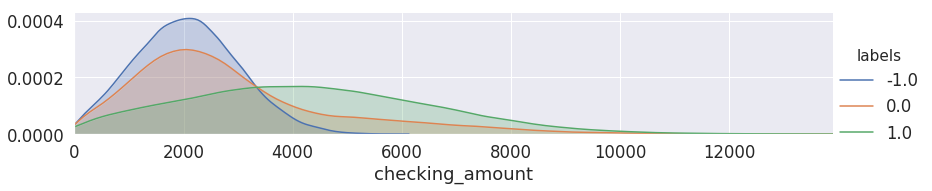

In [37]:
facet=sns.FacetGrid(df, hue='labels', aspect=4)
facet.map(sns.kdeplot, 'checking_amount', shade=True)
facet.set(xlim=(0, df['checking_amount'].max()))
facet.add_legend()

Similarly, we divide this feature into 2 groups:


1.   Group 0 (more likely won't repaid): 0-3300
2.   Group 1 (more likely will repaid): >3300



In [0]:
df.loc[df['checking_amount']<=3300,'checking_amount']=0
df.loc[df['checking_amount']>3300,'checking_amount']=1

# Combine total_credit_card_limit and and avg_percentage_credit_card_limit_used_last_year

In [39]:
rstr(pd.merge(df_borrower, df_loan, how='left', on='loan_id'), 'total_credit_card_limit').sort_values(by='corr total_credit_card_limit',ascending=False )

types  ...  corr total_credit_card_limit
total_credit_card_limit                            int64  ...                      1.000000
loan_repaid                                      float64  ...                      0.401911
checking_amount                                    int64  ...                      0.240926
saving_amount                                      int64  ...                      0.234181
yearly_salary                                      int64  ...                      0.222497
is_employed                                        int64  ...                      0.195274
loan_granted                                       int64  ...                      0.184099
fully_repaid_previous_loans                      float64  ...                      0.021643
loan_id                                            int64  ...                      0.001023
is_first_loan                                      int64  ...                      0.000679
age                                                int64  ...                     -0.004052
dependent_number                                   int64  ...                     -0.058650
avg_percentage_credit_card_limit_used_last_year  float64  ...                     -0.096055
currently_repaying_other_loans                   float64  ...                     -0.212519
loan_purpose                                      object  ...                           NaN
date                                              object  ...                           NaN

[16 rows x 9 columns]

Fill nan vlaue in "avg_percentage_credit_card_limit_used_last_year" by median of their checking_amout group because it has highest correlation with "total_credit_card_limit and and " 

In [0]:
df['avg_percentage_credit_card_limit_used_last_year'].fillna(df.groupby('checking_amount')['avg_percentage_credit_card_limit_used_last_year'].transform('median'), inplace=True)

In [0]:
df['credit_card_limit_used']=df_borrower['total_credit_card_limit']*df['avg_percentage_credit_card_limit_used_last_year']

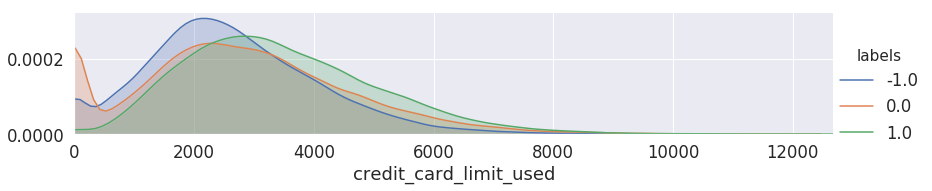

In [42]:
facet=sns.FacetGrid(df, hue='labels', aspect=4)
facet.map(sns.kdeplot, 'credit_card_limit_used', shade=True)
facet.set(xlim=(0, df['credit_card_limit_used'].max()))
facet.add_legend()

As we can see, we can divide this feature  into two group:


1.   Group 0: 0-500
2.   Group 1: 500-3000
3.   Group 2: >3000






In [0]:
df.loc[df['credit_card_limit_used']<=500, 'credit_card_limit_used']=0
df.loc[(df['credit_card_limit_used']>500) & (df['credit_card_limit_used']<=3000), 'credit_card_limit_used']=1
df.loc[df['credit_card_limit_used']>3000, 'credit_card_limit_used']=2

# yearly_salary

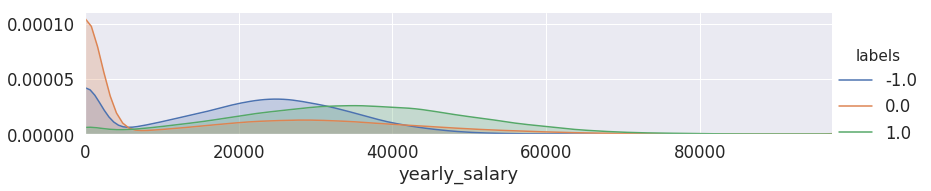

In [44]:
facet=sns.FacetGrid(df, hue='labels', aspect=4)
facet.map(sns.kdeplot, 'yearly_salary', shade=True)
facet.set(xlim=(0, df['yearly_salary'].max()))
facet.add_legend()

Similarly, we can divide this feature into 3 groups:

1.   Group 0 (more likely won't repaid): 0-700

1.   Group 1 (more likely won't be granted by bank): 700-2300
2.   Group 2 (more likely will repaid): >2300




In [0]:
df.loc[df['yearly_salary']<=700, 'yearly_salary']=0
df.loc[(df['yearly_salary']>700) & (df['yearly_salary']<=2300), 'yearly_salary']=1
df.loc[(df['yearly_salary']>2300), 'yearly_salary']=2

# age

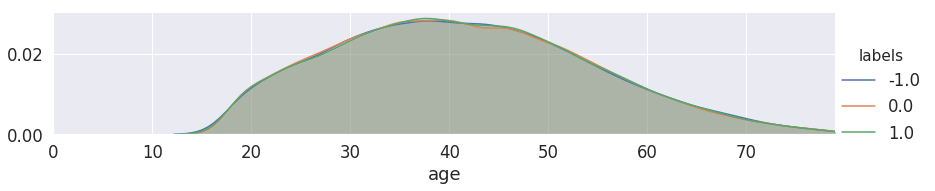

In [46]:
facet=sns.FacetGrid(df, hue='labels', aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()

We get nothing from this feature, so we should drop it

# Drop unused-feature

In [0]:
unused_col=['loan_id','is_first_loan','fully_repaid_previous_loans', 'currently_repaying_other_loans', 'avg_percentage_credit_card_limit_used_last_year'
            ,'age', 'date'
           , 'loan_granted', 'loan_repaid']
X=df.drop(unused_col , axis=1)

In [0]:

X=X.drop('labels', axis=1)
y_true=np.zeros((X.shape[0],))
for i in df.index:
  if df.loc[i, 'loan_granted']==0:
    y_true[i]=0
  else:
    if df.loc[i, 'loan_repaid']==1:
      y_true[i]=1
    else:
      y_true[i]=0

In [49]:
print(X.shape)
print(y_true.shape)

(101100, 8)
(101100,)


# Model

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import make_scorer

Let's write a function compute score of model:

In [0]:
def own_metric(y_true, y_pre):
  score=0
  for i in range(len(y_true)):
    if y_true[i]==1:
      if y_pre[i]==1:
        score+=1
    else:
      if y_pre[i]==1 and df.loc[i, 'loan_repaid']==0:
        score-=1
  return score

In [0]:
score=make_scorer(own_metric, greater_is_better=True)


Let's try with RandomForest

In [0]:

clf = RandomForestClassifier(bootstrap= False, max_depth= 6, max_features= 'log2', min_samples_leaf= 10, min_samples_split= 3, n_estimators= 10)
clf = clf.fit(X, y_true)

In [54]:
y_pre=clf.predict(X)
score(clf, X, y_true)

23689

In first try, we got a model much more better than bank's model

Look at the importace of each feature

In [0]:

features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

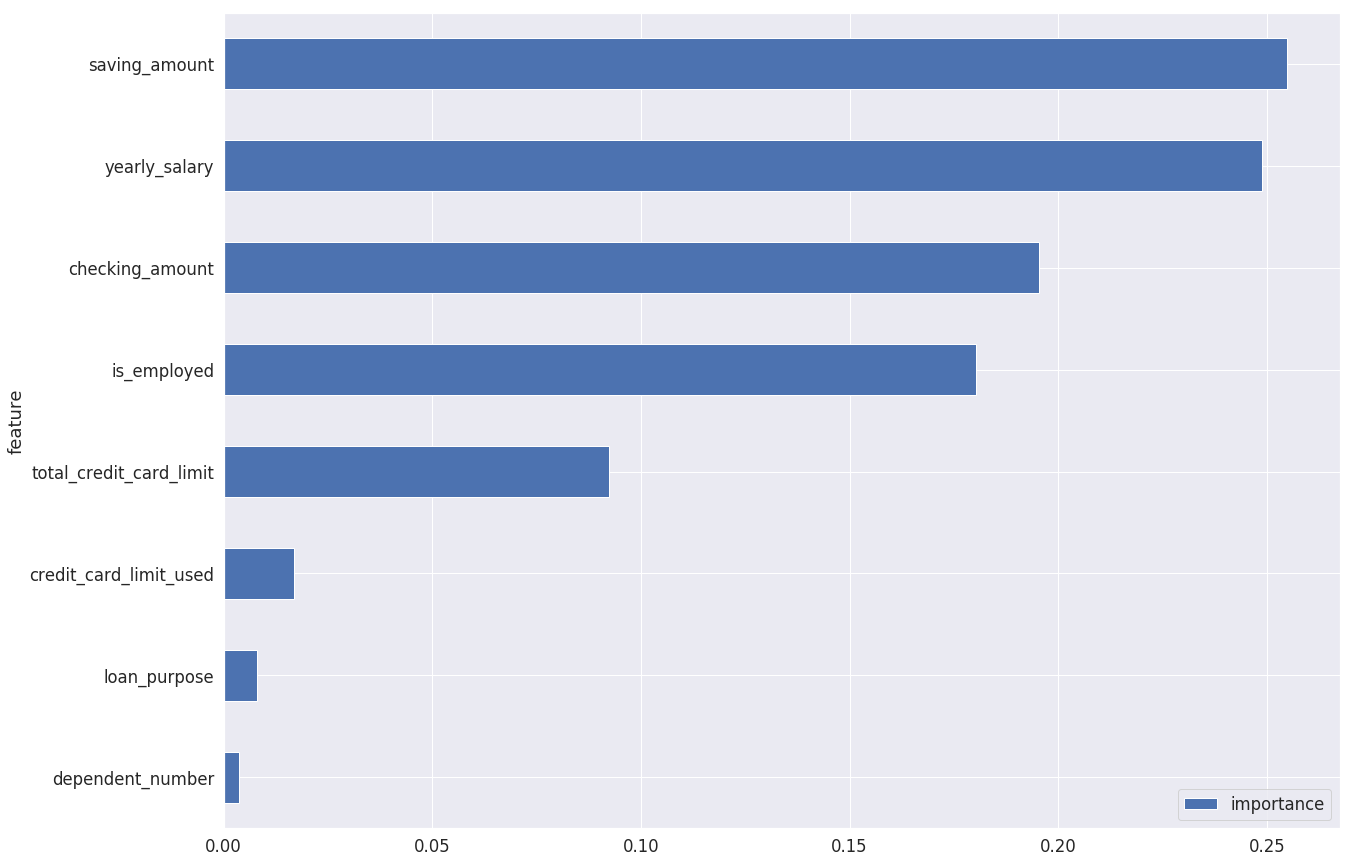

In [56]:
features.plot(kind='barh', figsize=(20, 15))

We see feature "is_employed"  also plays a key role in our model

Let's try with different base models

In [0]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
SVC=SVC()

models = [logreg, logreg_cv, rf, gboost, SVC]

In [58]:
for model in models:
  print('Score of : {0}'.format(model.__class__))
  model = model.fit(X, y_true)
  accu=score(model, X, y_true)
  print('CV score = {0}'.format(accu))
  print('==============')

Score of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 20438
Score of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 20440
Score of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 23473
Score of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 23554
Score of : <class 'sklearn.svm.classes.SVC'>
CV score = 24023


In [0]:
run_gs = True

if run_gs:
    parameter_grid = {
                 'C' : [ 0.1, 1, 10],
                 'gamma': [ 0.1, 1, 10]
                 }
    
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(SVC(),
                               scoring=score,
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(X, y_true)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


# Conclusion

After trying to predict, we got a model that is much more better than bank's model. The score we got is 24004 (>13758)

In [0]:
df.head()

loan_id  is_first_loan  ...  labels  credit_card_limit_used
0   289774              1  ...     0.0                     2.0
1   482590              0  ...     0.0                     2.0
2   135565              1  ...     1.0                     2.0
3   207797              0  ...     0.0                     1.0
4   828078              0  ...     0.0                     2.0

[5 rows x 18 columns]